Implement a simple single/Multi-layer perceptron from scratch in Python to solve a basic binary classification problem (e.g., XOR gate). Train, it using gradient descent and visualize its decision boundary.

XOR Gate implemented using multi-layer perceptron

Epoch 0 - Loss: 0.7339
Epoch 1000 - Loss: 0.3714
Epoch 2000 - Loss: 0.3563
Epoch 3000 - Loss: 0.3525
Epoch 4000 - Loss: 0.3507
Epoch 5000 - Loss: 0.3498
Epoch 6000 - Loss: 0.3492
Epoch 7000 - Loss: 0.3488
Epoch 8000 - Loss: 0.3485
Epoch 9000 - Loss: 0.3482
Predictions after training:
[[0.]
 [0.]
 [1.]
 [1.]]


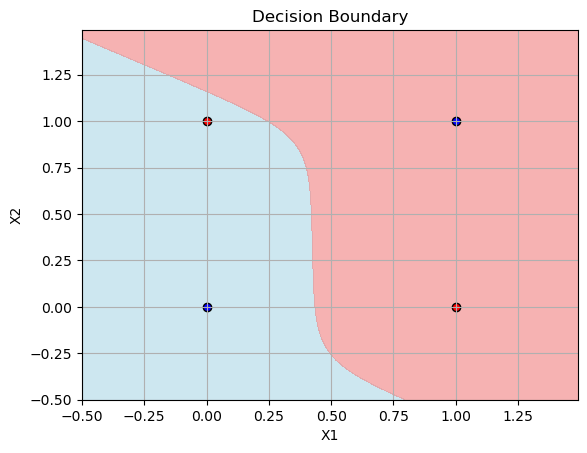

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Sigmoid activation and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Initialize weights and biases
np.random.seed(0)
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1
epochs = 10000

w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)

    # Loss (Binary Cross-Entropy)
    loss = -np.mean(y * np.log(a2 + 1e-8) + (1 - y) * np.log(1 - a2 + 1e-8))

    # Backward pass
    dz2 = a2 - y
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(z1)
    dw1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Update weights and biases
    w2 -= lr * dw2
    b2 -= lr * db2
    w1 -= lr * dw1
    b1 -= lr * db1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.4f}")

# Final predictions
print("Predictions after training:")
print(np.round(a2))

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Forward pass for grid
    a1_grid = sigmoid(np.dot(grid, w1) + b1)
    a2_grid = sigmoid(np.dot(a1_grid, w2) + b2)
    preds = a2_grid.reshape(xx.shape)

    # Use red for class 1, blue for class 0
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], colors=["lightblue", "lightcoral"], alpha=0.6)

    # Plot actual points
    for i in range(len(X)):
        plt.scatter(X[i, 0], X[i, 1], color='red' if y[i] == 1 else 'blue', edgecolors='k')

    plt.title("Decision Boundary")
    plt.grid(True)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
plot_decision_boundary(X, y, None)

Epoch 0 - Loss: 0.7339
Epoch 1000 - Loss: 0.3714
Epoch 2000 - Loss: 0.3563
Epoch 3000 - Loss: 0.3525
Epoch 4000 - Loss: 0.3507
Epoch 5000 - Loss: 0.3498
Epoch 6000 - Loss: 0.3492
Epoch 7000 - Loss: 0.3488
Epoch 8000 - Loss: 0.3485
Epoch 9000 - Loss: 0.3482

XOR Truth Table with Predictions:

Input 1 | Input 2 | Expected | Predicted | Class
-----------------------------------------------
   0     |    0    |    0     |   0.001   |   0
   0     |    1    |    1     |   0.499   |   0
   1     |    0    |    1     |   0.998   |   1
   1     |    1    |    0     |   0.501   |   1


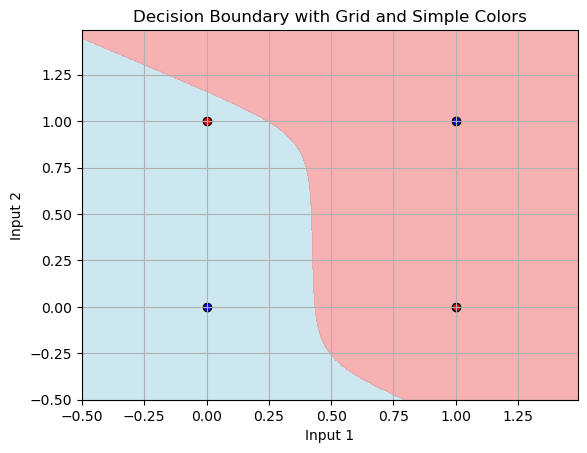

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Sigmoid activation and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Initialize weights and biases
np.random.seed(0)
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1
epochs = 10000

w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)

    # Loss (Binary Cross-Entropy)
    loss = -np.mean(y * np.log(a2 + 1e-8) + (1 - y) * np.log(1 - a2 + 1e-8))

    # Backward pass
    dz2 = a2 - y
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(z1)
    dw1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights and biases
    w2 -= lr * dw2
    b2 -= lr * db2
    w1 -= lr * dw1
    b1 -= lr * db1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.4f}")

# Final predictions
y_pred = a2
y_class = (y_pred > 0.5).astype(int)

# Print the XOR truth table with predictions
print("\nXOR Truth Table with Predictions:\n")
print("Input 1 | Input 2 | Expected | Predicted | Class")
print("-----------------------------------------------")
for i in range(len(X)):
    x1, x2 = X[i]
    expected = y[i][0]
    pred_prob = y_pred[i][0]
    pred_class = y_class[i][0]
    print(f"   {x1}     |    {x2}    |    {expected}     |   {pred_prob:.3f}   |   {pred_class}")

# Plot decision boundary with simple colors and grid lines
def plot_decision_boundary(X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    a1_grid = sigmoid(np.dot(grid, w1) + b1)
    a2_grid = sigmoid(np.dot(a1_grid, w2) + b2)
    preds = a2_grid.reshape(xx.shape)

    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], colors=["lightblue", "lightcoral"], alpha=0.6)
    for i in range(len(X)):
        plt.scatter(X[i, 0], X[i, 1], color='red' if y[i] == 1 else 'blue', edgecolors='k')
    plt.title("Decision Boundary")
    plt.grid(True)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_decision_boundary(X, y)
